In [55]:
import pandas as pd
import numpy as np
import matplotlib.pyplot  as plt
from matplotlib.colors import ListedColormap

from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier


# K-Nearest Neighbors
![purple-divider](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)


The idea behind K-Nearest Neighbors (KNN) is very simple.1
For each record to be
classified or predicted:
1. Find K records that have similar features (i.e., similar predictor values).
2. For classification, find out what the majority class is among those similar records
and assign that class to the new record.
3. For prediction (also called KNN regression), find the average among those similar
records, and predict that average for the new record.

In [2]:
loan200 = pd.read_csv('E:\machine_learning_projects\Statistics for Data Science\Statistical_machine_learning\loan200.csv')
 
predictors = ['payment_inc_ratio', 'dti']
outcome = 'outcome'


newloan = loan200.loc[0:0, predictors]
X = loan200.loc[1:, predictors]
y = loan200.loc[1:, outcome]

knn = KNeighborsClassifier(n_neighbors=20)
knn.fit(X, y)
print(knn.predict(newloan))
print(knn.predict_proba(newloan))

['paid off']
[[0.45 0.55]]


e:\machine_learning_projects\machine_learning\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
e:\machine_learning_projects\machine_learning\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


# Distance Metrics

There are numerous other metrics for measuring distance between
vectors. For numeric data, Mahalanobis distance is attractive since
it accounts for the correlation between two variables. This is useful
since if two variables are highly correlated, Mahalanobis will essen‐
tially treat these as a single variable in terms of distance. Euclidean
and Manhattan distance do not account for the correlation, effec‐
tively placing greater weight on the attribute that underlies those
features. Mahalanobis distance is the Euclidean distance between
the principal components (see “Principal Components Analysis”
on page 284). The downside of using Mahalanobis distance is
increased computational effort and complexity; it is computed
using the covariance matrix (see “Covariance Matrix” on page 202).

# Standerdisation

Using the z-score is just one way to rescale variables. Instead of the
mean, a more robust estimate of location could be used, such as the
median. Likewise, a different estimate of scale such as the inter‐
quartile range could be used instead of the standard deviation.
Sometimes, variables are “squashed” into the 0–1 range. It’s also
important to realize that scaling each variable to have unit variance
is somewhat arbitrary. This implies that each variable is thought to
have the same importance in predictive power. If you have subjec‐
tive knowledge that some variables are more important than oth‐
ers, then these could be scaled up. For example, with the loan data,
it is reasonable to expect that the payment-to-income ratio is very
important.
Normalization (standardization) does not change the distributional
shape of the data; it does not make it normally shaped if it was not
already normally shaped (see “Normal Distribution” on page 69).

# Choosing K

The K that best balances between overfitting and oversmoothing is typically deter‐
mined by accuracy metrics and, in particular, accuracy with holdout or validation
data. There is no general rule about the best K—it depends greatly on the nature of
the data. For highly structured data with little noise, smaller values of K work best.
Borrowing a term from the signal processing community, this type of data is some‐
times referred to as having a high signal-to-noise ratio (SNR). Examples of data with a
typically high SNR are data sets for handwriting and speech recognition. For noisy
data with less structure (data with a low SNR), such as the loan data, larger values of
K are appropriate. Typically, values of K fall in the range 1 to 20. Often, an odd num‐
ber is chosen to avoid ties.

Generally speaking, if K is too low, we may be overfitting: including the noise in the
data. Higher values of K provide smoothing that reduces the risk of overfitting in the
training data. On the other hand, if K is too high, we may oversmooth the data and
miss out on KNN’s ability to capture the local structure in the data, one of its main
advantages.


# KNN as a Feature Engine

KNN gained its popularity due to its simplicity and intuitive nature. In terms of per‐
formance, KNN by itself is usually not competitive with more sophisticated classifica‐
tion techniques. In practical model fitting, however, KNN can be used to add “local
knowledge” in a staged process with other classification techniques:
1. KNN is run on the data, and for each record, a classification (or quasi-probability
of a class) is derived.
2. That result is added as a new feature to the record, and another classification
method is then run on the data. The original predictor variables are thus used
twice.

At first you might wonder whether this process, since it uses some predictors twice,
causes a problem with multicollinearity (see “Multicollinearity” on page 172). This is
not an issue, since the information being incorporated into the second-stage model is
highly local, derived only from a few nearby records, and is therefore additional
information and not redundant.


In [5]:
loan_data = pd.read_csv('E:\machine_learning_projects\Statistics for Data Science\Statistical_machine_learning\loan_data.csv')
loan_data.head()
loan_data.outcome.unique()

array(['default', 'paid off'], dtype=object)

In [8]:
loan_data.head()

,Unnamed: 0,status,loan_amnt,term,annual_inc,dti,payment_inc_ratio,revol_bal,revol_util,purpose,...,delinq_2yrs_zero,pub_rec_zero,open_acc,grade,outcome,emp_length,purpose_,home_,emp_len_,borrower_score
0,1,Charged Off,2500,60 months,30000,1.00,2.39320,1687,9.4,car,...,1,1,3,4.8,default,1,major_purchase,RENT,> 1 Year,0.65
1,2,Charged Off,5600,60 months,40000,5.55,4.57170,5210,32.6,small_business,...,1,1,11,1.4,default,5,small_business,OWN,> 1 Year,0.80
2,3,Charged Off,5375,60 months,15000,18.08,9.71600,9279,36.5,other,...,1,1,2,6.0,default,1,other,RENT,> 1 Year,0.60
3,4,Charged Off,9000,36 months,30000,10.08,12.21520,10452,91.7,debt_consolidation,...,1,1,4,4.2,default,1,debt_consolidation,RENT,> 1 Year,0.50
4,5,Charged Off,10000,36 months,100000,7.06,3.90888,11997,55.5,other,...,1,1,14,5.4,default,4,other,RENT,> 1 Year,0.55


In [7]:
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45342 entries, 0 to 45341
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         45342 non-null  int64  
 1   status             45342 non-null  object 
 2   loan_amnt          45342 non-null  int64  
 3   term               45342 non-null  object 
 4   annual_inc         45342 non-null  int64  
 5   dti                45342 non-null  float64
 6   payment_inc_ratio  45342 non-null  float64
 7   revol_bal          45342 non-null  int64  
 8   revol_util         45342 non-null  float64
 9   purpose            45342 non-null  object 
 10  home_ownership     45342 non-null  object 
 11  delinq_2yrs_zero   45342 non-null  int64  
 12  pub_rec_zero       45342 non-null  int64  
 13  open_acc           45342 non-null  int64  
 14  grade              45342 non-null  float64
 15  outcome            45342 non-null  object 
 16  emp_length         453

In [6]:
predictors = ['dti', 'revol_bal', 'revol_util', 'open_acc', 
              'delinq_2yrs_zero', 'pub_rec_zero']
outcome = 'outcome'

X = loan_data[predictors]
y = loan_data[outcome]

In [10]:
knn = KNeighborsClassifier(n_neighbors=20)
knn.fit(X, y)

knn.predict_proba(X)[:, 0]

loan_data['borrower_score'] = knn.predict_proba(X)[:, 0]
print(loan_data['borrower_score'].describe())

e:\machine_learning_projects\machine_learning\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
e:\machine_learning_projects\machine_learning\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


count    45342.000000
mean         0.501091
std          0.128728
min          0.000000
25%          0.400000
50%          0.500000
75%          0.600000
max          0.950000
Name: borrower_score, dtype: float64


# Tree Model

In [12]:
loan3000 = pd.read_csv('E:\machine_learning_projects\Statistics for Data Science\Statistical_machine_learning\loan3000.csv')

In [13]:
predictors = ['borrower_score', 'payment_inc_ratio']
outcome = 'outcome'
X = loan3000[predictors]
y = loan3000[outcome]

In [16]:
loan_tree = DecisionTreeClassifier(random_state=1, criterion='entropy',
 min_impurity_decrease=0.003)
loan_tree.fit(X, y)


DecisionTreeClassifier(criterion='entropy', min_impurity_decrease=0.003,
                       random_state=1)

[Text(418.5, 475.65000000000003, 'borrower_score <= 0.575\nentropy = 0.999\nsamples = 3000\nvalue = [1445, 1555]\nclass = default'),
 Text(167.4, 339.75, 'borrower_score <= 0.325\nentropy = 0.99\nsamples = 2122\nvalue = [1184, 938]\nclass = paid off'),
 Text(83.7, 203.85000000000002, 'entropy = 0.751\nsamples = 265\nvalue = [208, 57]\nclass = paid off'),
 Text(251.10000000000002, 203.85000000000002, 'payment_inc_ratio <= 10.423\nentropy = 0.998\nsamples = 1857\nvalue = [976, 881]\nclass = paid off'),
 Text(167.4, 67.94999999999999, 'entropy = 1.0\nsamples = 1294\nvalue = [631, 663]\nclass = default'),
 Text(334.8, 67.94999999999999, 'entropy = 0.963\nsamples = 563\nvalue = [345, 218]\nclass = paid off'),
 Text(669.6, 339.75, 'payment_inc_ratio <= 9.191\nentropy = 0.878\nsamples = 878\nvalue = [261, 617]\nclass = default'),
 Text(585.9, 203.85000000000002, 'borrower_score <= 0.725\nentropy = 0.766\nsamples = 600\nvalue = [134, 466]\nclass = default'),
 Text(502.20000000000005, 67.949999

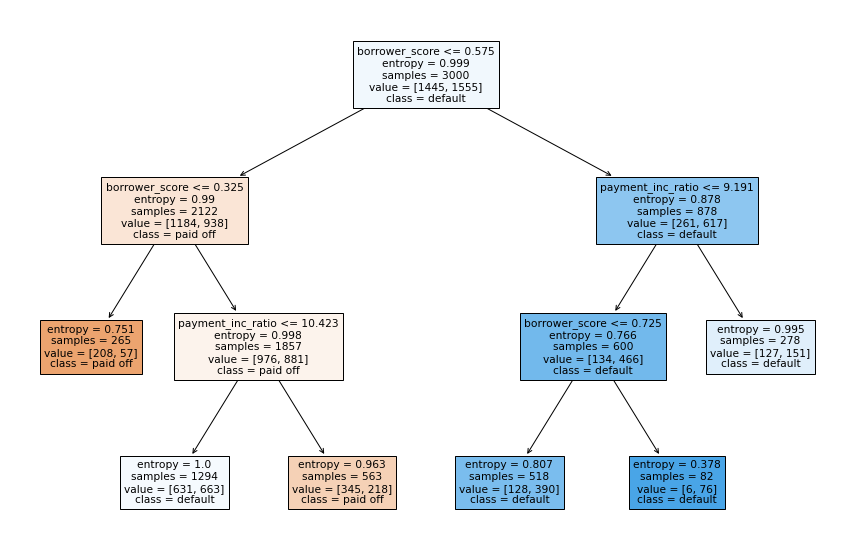

In [23]:
##  Plotting the Tree
fig, ax = plt.subplots(figsize = (15,10))
tree.plot_tree(loan_tree, ax = ax, feature_names= predictors, class_names = loan3000.outcome.unique(),filled = True)

In [24]:
loan_tree_gini = DecisionTreeClassifier(random_state=1, criterion='gini',
 min_impurity_decrease=0.003)
loan_tree_gini.fit(X, y)

DecisionTreeClassifier(min_impurity_decrease=0.003, random_state=1)

[Text(418.5, 475.65000000000003, 'borrower_score <= 0.575\ngini = 0.499\nsamples = 3000\nvalue = [1445, 1555]\nclass = default'),
 Text(209.25, 339.75, 'borrower_score <= 0.375\ngini = 0.493\nsamples = 2122\nvalue = [1184, 938]\nclass = paid off'),
 Text(104.625, 203.85000000000002, 'gini = 0.405\nsamples = 483\nvalue = [347, 136]\nclass = paid off'),
 Text(313.875, 203.85000000000002, 'payment_inc_ratio <= 10.423\ngini = 0.5\nsamples = 1639\nvalue = [837, 802]\nclass = paid off'),
 Text(209.25, 67.94999999999999, 'gini = 0.499\nsamples = 1157\nvalue = [547, 610]\nclass = default'),
 Text(418.5, 67.94999999999999, 'gini = 0.479\nsamples = 482\nvalue = [290, 192]\nclass = paid off'),
 Text(627.75, 339.75, 'payment_inc_ratio <= 9.191\ngini = 0.418\nsamples = 878\nvalue = [261, 617]\nclass = default'),
 Text(523.125, 203.85000000000002, 'gini = 0.347\nsamples = 600\nvalue = [134, 466]\nclass = default'),
 Text(732.375, 203.85000000000002, 'gini = 0.496\nsamples = 278\nvalue = [127, 151]\n

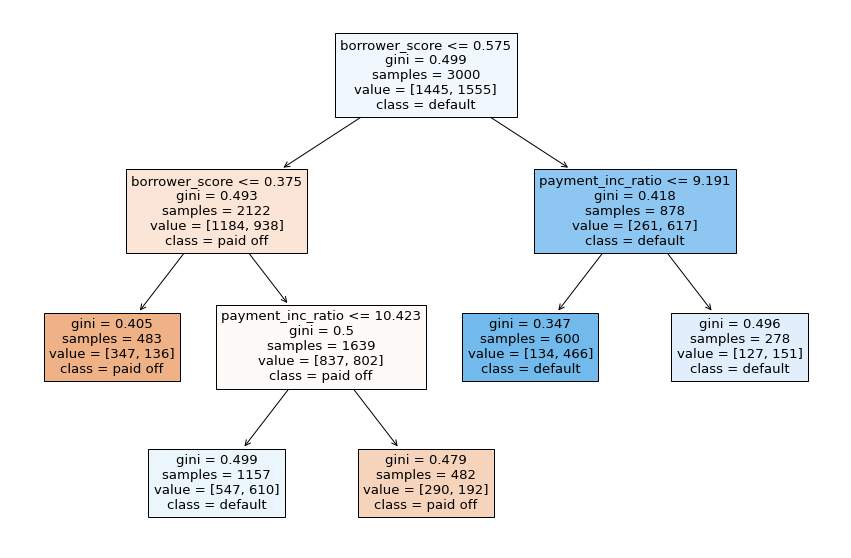

In [25]:
##  Plotting the Tree
fig, ax = plt.subplots(figsize = (15,10))
tree.plot_tree(loan_tree_gini, ax = ax, feature_names= predictors, class_names = loan3000.outcome.unique(),filled = True)

How Trees Are Used

One of the big obstacles faced by predictive modelers in organizations is the per‐
ceived “black box” nature of the methods they use, which gives rise to opposition
from other elements of the organization. In this regard, the tree model has two
appealing aspects:

• Tree models provide a visual tool for exploring the data, to gain an idea of what
variables are important and how they relate to one another. Trees can capture
nonlinear relationships among predictor variables.

• Tree models provide a set of rules that can be effectively communicated to non‐
specialists, either for implementation or to “sell” a data mining project.

# Bagging and the Random Forest

The simple version of ensembles is as follows:
1. Develop a predictive model and record the predictions for a given data set.
2. Repeat for multiple models on the same data.
3. For each record to be predicted, take an average (or a weighted average, or a
majority vote) of the predictions.

![image](Bagging.jpg)

# Random Forest

In [28]:
predictors = ['borrower_score', 'payment_inc_ratio']
outcome = 'outcome'
X = loan3000[predictors]
y = loan3000[outcome]
rf = RandomForestClassifier(n_estimators=500, random_state=1, oob_score=True)
rf.fit(X, y)

e:\machine_learning_projects\machine_learning\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


RandomForestClassifier(n_estimators=500, oob_score=True, random_state=1)

# Variable Importance (Feature Importance)

On wieghted avg. a node(feature) reduces the impurity across the tree. (weight - no of the sample a node (feature) contain)

In [29]:
predictors = ['loan_amnt', 'term', 'annual_inc', 'dti', 
              'payment_inc_ratio', 'revol_bal', 'revol_util', 
              'purpose', 'delinq_2yrs_zero', 'pub_rec_zero', 
              'open_acc', 'grade', 'emp_length', 'purpose_', 
              'home_', 'emp_len_', 'borrower_score']
outcome = 'outcome'

X = pd.get_dummies(loan_data[predictors], drop_first=True)
y = loan_data[outcome]

rf_all = RandomForestClassifier(n_estimators=500, random_state=1)
rf_all.fit(X, y)

RandomForestClassifier(n_estimators=500, random_state=1)

In [35]:
rf_all.feature_importances_.shape

(33,)

In [39]:
loan_data.columns.shape

(21,)

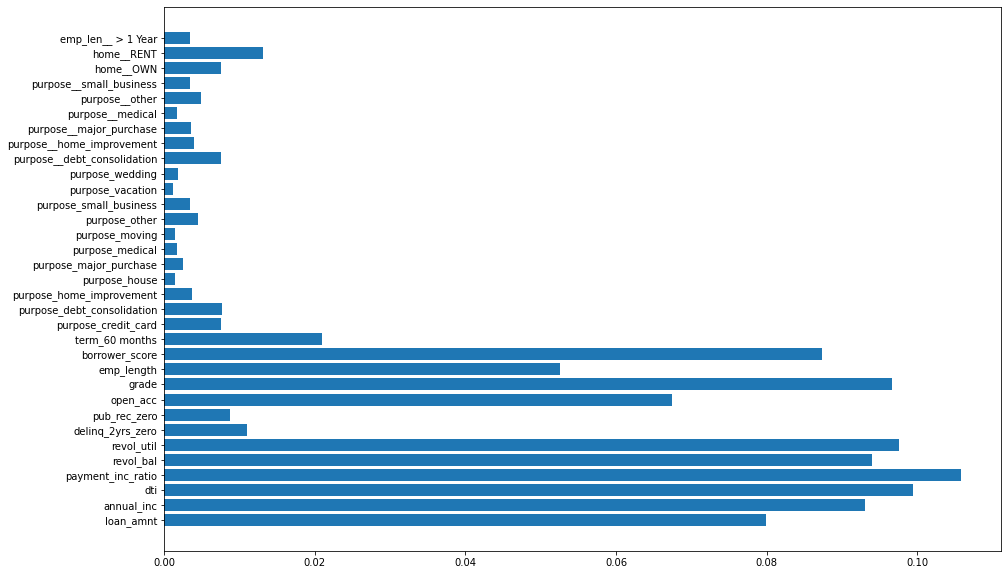

In [41]:
fig ,ax = plt.subplots(figsize = (15,10))
ax.barh(X.columns, rf_all.feature_importances_)
plt.show()

# Hyperparameters

nodesize/min_samples_leaf

The minimum size for terminal nodes (leaves in the tree). The default is 1 for
classification and 5 for regression in R. The scikit-learn implementation in
Python uses a default of 1 for both.

maxnodes/max_leaf_nodes

The maximum number of nodes in each decision tree. By default, there is no
limit and the largest tree will be fit subject to the constraints of nodesize. Note
that in Python, you specify the maximum number of terminal nodes. The two
parameters are related:

maxnodes = 2max_leaf _nodes − 1

It may be tempting to ignore these parameters and simply go with the default values.
However, using the defaults may lead to overfitting when you apply the random for‐
est to noisy data. When you increase nodesize/min_samples_leaf or set maxnodes/
max_leaf_nodes, the algorithm will fit smaller trees and is less likely to create spurious predictive rules. 

# Ada Boost

In [1]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_moons

X, y = make_moons(n_samples=500, noise=0.30, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

The following code trains an AdaBoost classifier based on 200 Decision Stumps using
Scikit-Learn’s AdaBoostClassifier class (as you might expect, there is also an Ada
BoostRegressor class). A Decision Stump is a Decision Tree with max_depth=1—in
other words, a tree composed of a single decision node plus two leaf nodes. This is
the default base estimator for the AdaBoostClassifier class:


In [46]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
ada_clf = AdaBoostClassifier(
    DecisionTreeClassifier(max_depth = 1), 
    n_estimators = 200,
    learning_rate= 0.1,
    random_state= 42,
    algorithm= 'SAMME.R'
    )

ada_clf.fit(X_train, y_train)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=1),
                   learning_rate=0.1, n_estimators=200, random_state=42)

In [56]:
def plot_decision_boundary(clf, X, y, axes=[-1.5, 2.45, -1, 1.5], alpha=0.5, contour=True):
    x1s = np.linspace(axes[0], axes[1], 100)
    x2s = np.linspace(axes[2], axes[3], 100)
    x1, x2 = np.meshgrid(x1s, x2s)
    X_new = np.c_[x1.ravel(), x2.ravel()]
    y_pred = clf.predict(X_new).reshape(x1.shape)
    custom_cmap = ListedColormap(['#fafab0','#9898ff','#a0faa0'])
    plt.contourf(x1, x2, y_pred, alpha=0.3, cmap=custom_cmap)
    if contour:
        custom_cmap2 = ListedColormap(['#7d7d58','#4c4c7f','#507d50'])
        plt.contour(x1, x2, y_pred, cmap=custom_cmap2, alpha=0.8)
    plt.plot(X[:, 0][y==0], X[:, 1][y==0], "yo", alpha=alpha)
    plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs", alpha=alpha)
    plt.axis(axes)
    plt.xlabel(r"$x_1$", fontsize=18)
    plt.ylabel(r"$x_2$", fontsize=18, rotation=0)

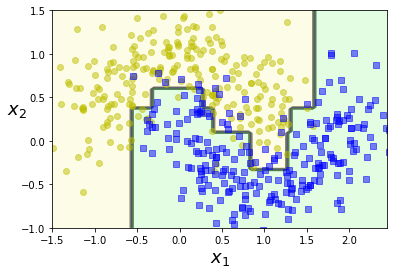

In [57]:
plot_decision_boundary(ada_clf, X, y)

#  XG Boost

In [4]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import xgboost

In [7]:
loan3000 = pd.read_csv('E:\machine_learning_projects\Statistics for Data Science\Statistical_machine_learning\loan3000.csv')
loan3000.head()

,Unnamed: 0,outcome,purpose_,dti,borrower_score,payment_inc_ratio
0,32109,paid off,debt_consolidation,21.23,0.40,5.11135
1,16982,default,credit_card,15.49,0.40,5.43165
2,25335,paid off,debt_consolidation,27.30,0.70,9.23003
3,34580,paid off,major_purchase,21.11,0.40,2.33482
4,14424,default,debt_consolidation,16.46,0.45,12.10320


In [8]:
predictors = ['borrower_score', 'payment_inc_ratio']
outcome = 'outcome'
X = loan3000.loc[:, predictors]
y = pd.Series([1 if i == 'default' else 0 for i in loan3000.outcome])

In [10]:
from xgboost import XGBClassifier
xgb = XGBClassifier(objective= 'binary:logistic', subsample = 0.63,
                    use_label_encoder=False, eval_metric='error')
xgb.fit(X,y)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              eval_metric='error', gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=8,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=0.63,
              tree_method='exact', use_label_encoder=False,
              validate_parameters=1, verbosity=None)

In [13]:
predicted_value = xgb.predict(X)

In [15]:
data = loan3000.copy()
data['prediction'] = predicted_value

In [16]:
data.columns

Index(['Unnamed: 0', 'outcome', 'purpose_', 'dti', 'borrower_score',
       'payment_inc_ratio', 'prediction'],
      dtype='object')

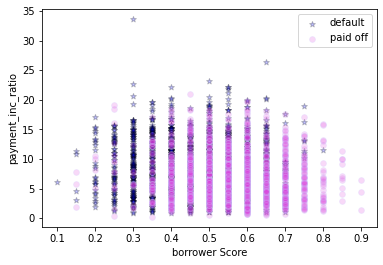

In [26]:
## plotting the model

fig, ax = plt.subplots()

ax.scatter(data.loc[data.prediction == 1, ['borrower_score']],
            data.loc[data.prediction == 1, ['payment_inc_ratio']], label = 'default', color = 'blue', alpha = 0.25, edgecolors= 'k', marker = '*'  )
ax.scatter(data.loc[data.prediction == 0, ['borrower_score']],
            data.loc[data.prediction == 0, ['payment_inc_ratio']], label = 'paid off', c = '#dd44dd', alpha = 0.2, edgecolors= '#ccccff')
ax.legend()
ax.set_xlabel('borrower Score')
ax.set_ylabel('payment_inc_ratio')
plt.show()

# Regularisation avoid overfitting

In [27]:
loan_data = pd.read_csv('E:\machine_learning_projects\Statistics for Data Science\Statistical_machine_learning\loan_data.csv')

from sklearn.model_selection import train_test_split

predictors = ['loan_amnt', 'term', 'annual_inc', 'dti', 'payment_inc_ratio',
 'revol_bal', 'revol_util', 'purpose', 'delinq_2yrs_zero',
 'pub_rec_zero', 'open_acc', 'grade', 'emp_length', 'purpose_',
 'home_', 'emp_len_', 'borrower_score']
outcome = 'outcome'
X = pd.get_dummies(loan_data[predictors], drop_first=True)
y = pd.Series([1 if o == 'default' else 0 for o in loan_data[outcome]])
train_X, valid_X, train_y, valid_y = train_test_split(X, y, test_size=10000)
xgb_default = XGBClassifier(objective='binary:logistic', n_estimators=250,
 max_depth=6, reg_lambda=0, learning_rate=0.3,
 subsample=1)
xgb_default.fit(train_X, train_y)

e:\machine_learning_projects\machine_learning\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[11:31:38] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.3, max_delta_step=0,
              max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=250, n_jobs=8,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=0, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [28]:
pred_default = xgb_default.predict_proba(valid_X)[:, 1]

In [29]:
pred_default

array([0.520356  , 0.9438082 , 0.5542597 , ..., 0.64082557, 0.8929708 ,
       0.5355926 ], dtype=float32)

In [34]:
error_default = abs(valid_y - pred_default) > 0.5
print('default: ', np.mean(error_default))


default:  0.3494


There are two parameters in xgboost to regularize the model: alpha and lambda,
which correspond to Manhattan distance (L1-regularization) and squared Euclidean
distance (L2-regularization), respectively (see “Distance Metrics” on page 241).
Increasing these parameters will penalize more complex models and reduce the size
of the trees that are fit.

In [35]:
xgb_penalty = XGBClassifier(objective='binary:logistic', n_estimators=250,
 max_depth=6, reg_lambda=1000, learning_rate=0.1,
 subsample=0.63)
xgb_penalty.fit(train_X, train_y)
pred_penalty = xgb_penalty.predict_proba(valid_X)[:, 1]
error_penalty = abs(valid_y - pred_penalty) > 0.5
print('penalty: ', np.mean(error_penalty))

e:\machine_learning_projects\machine_learning\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[11:38:38] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
penalty:  0.3263


In Python, we can call the predict_proba method with the ntree_limit argument:
that forces only
the first i trees to be used in the prediction. 

In [36]:
results = []
for i in range(1, 250):
 train_default = xgb_default.predict_proba(train_X, ntree_limit=i)[:, 1]
 train_penalty = xgb_penalty.predict_proba(train_X, ntree_limit=i)[:, 1]
 pred_default = xgb_default.predict_proba(valid_X, ntree_limit=i)[:, 1]
 pred_penalty = xgb_penalty.predict_proba(valid_X, ntree_limit=i)[:, 1]
 results.append({
 'iterations': i,
 'default train': np.mean(abs(train_y - train_default) > 0.5),
 'penalty train': np.mean(abs(train_y - train_penalty) > 0.5),
 'default test': np.mean(abs(valid_y - pred_default) > 0.5),
 'penalty test': np.mean(abs(valid_y - pred_penalty) > 0.5),
 })
results = pd.DataFrame(results)
results.head()

e:\machine_learning_projects\machine_learning\lib\site-packages\xgboost\core.py:105: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(


,iterations,default train,penalty train,default test,penalty test
0,1,0.341633,0.338181,0.3579,0.3519
1,2,0.331023,0.336201,0.3485,0.3457
2,3,0.325647,0.339935,0.3427,0.3474
3,4,0.321402,0.336059,0.3421,0.3451
4,5,0.319365,0.335465,0.3384,0.3435


We can use the pandas plot method to create the line graph. The axis returned from
the first plot allows us to overlay additional lines onto the same graph. This is a pat‐
tern that many of Python’s graph packages support:

<AxesSubplot:xlabel='iterations'>

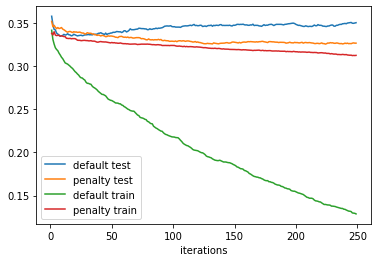

In [37]:
ax = results.plot(x='iterations', y='default test')
results.plot(x='iterations', y='penalty test', ax=ax)
results.plot(x='iterations', y='default train', ax=ax)
results.plot(x='iterations', y='penalty train', ax=ax)

# Rough
